Step 1:
EDA STEPS:
1.Indexing data

2.Visualize data(check the statistical data for each column)

3.Barchart/piechart(default rate in different regions, default rate in different types)

4.Attribute(numeric(correlation),rank the top 10 correlation),
EDA
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
simple histogram and distribution.

5. Correlation (with the target varaible)

Step 2:
toy_data = df.head(100)

pre-processing
missing value (impute(), delete,)
categorical varaible (onehot encoding)
outlier

Step 3:
Model:

1.Naive-Bayes

2.Logistic regression

3.Neuro Network

4.Decision tree

5. Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

6. Adaboost
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Step 3:
Evaluate the model and compare it
cross_val_score
accuracy, sensitivity...

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics


In [1]:
##Thanks for Janio Alexander's code

##importing packages and data
import pandas as pd
import numpy as np
loan=pd.read_csv('/Users/taotao/Desktop/loan/loan.csv',low_memory=False)
loan_original=loan.copy()

##import packages for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

##visualize data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [3]:
# Replace the name of some columns
loan = loan.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})


In [4]:
## check the statistical info of the colums
loan.describe()

,id,member_id,loan_amount,funded_amount,investor_funds,interest_rate,installment,annual_income,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total committed by Investors')

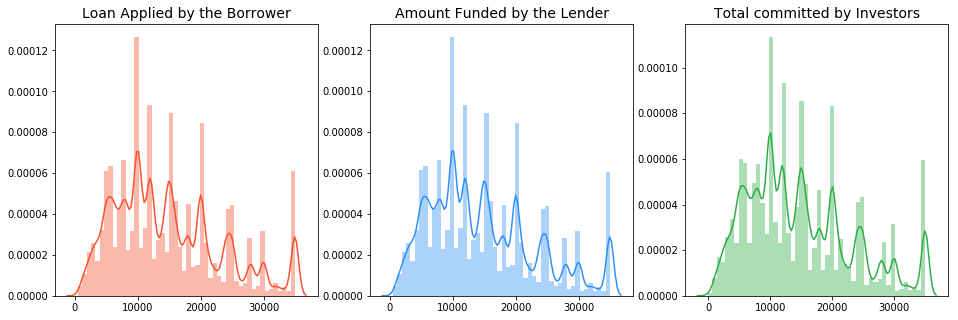

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))




loan_amount = loan["loan_amount"].values
funded_amount = loan["funded_amount"].values
investor_funds = loan["investor_funds"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

Text(0,0.5,'Average loan amount issued')

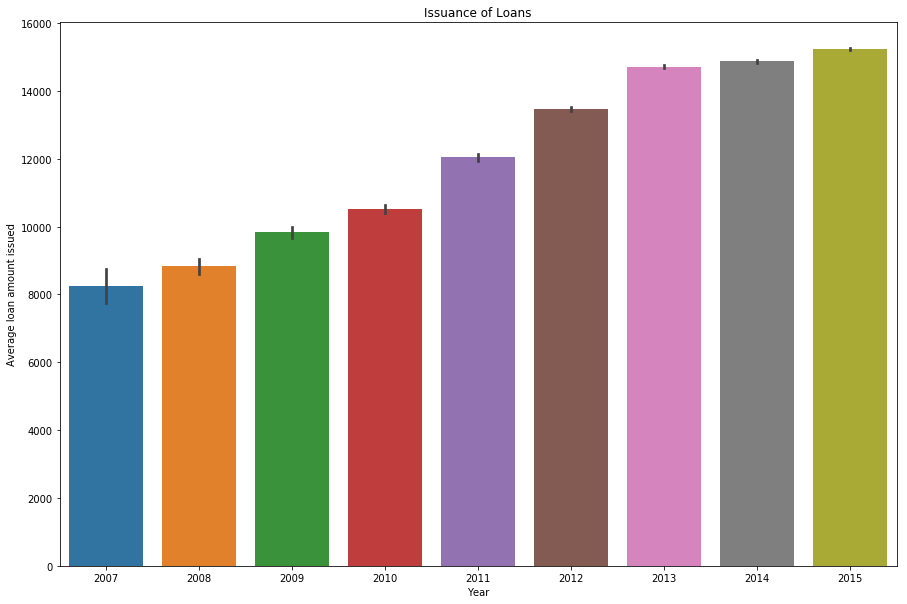

In [6]:
##analyze loan_amount column
## 1.find out the which year has the largest amount of loan issuance(using bar plot)
## it turns out issuance of loans ranked high in 2015.

##calculate the amount of loan issued by year.
loan['issue_d'].head()
loan_series = pd.to_datetime(loan['issue_d'])
loan['year'] = loan_series.dt.year

## plot the loan_amount each year
plt.figure(figsize=(15,10))
sns.barplot('year', 'loan_amount', data=loan)
plt.title('Issuance of Loans')
plt.xlabel('Year')
plt.ylabel('Average loan amount issued')

Text(0,0.5,'Average loan amount issued')

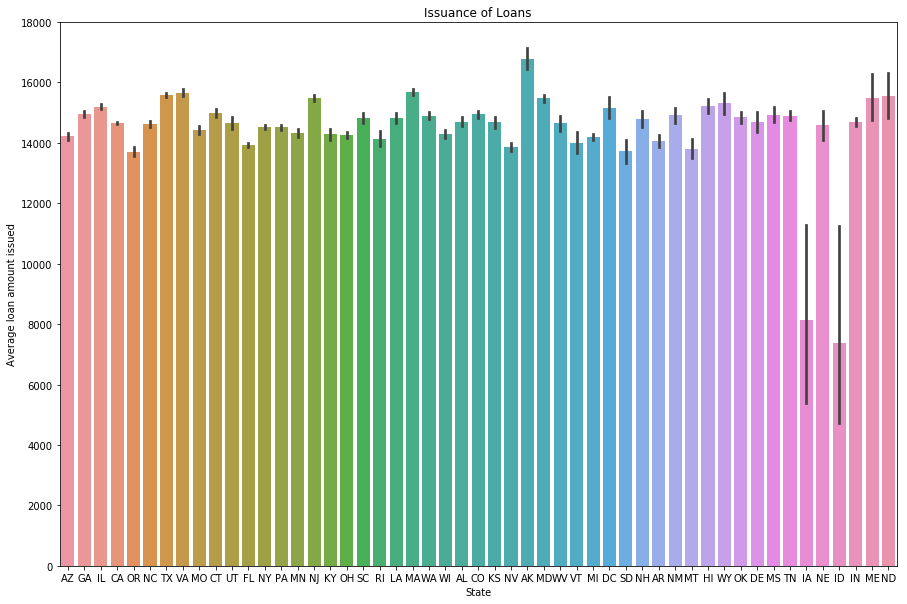

In [7]:
## 2.find out which states has the largest amount of loan issuance(using bar plot)
plt.figure(figsize=(15,10))
sns.barplot('addr_state', 'loan_amount', data=loan)
plt.title('Issuance of Loans')
plt.xlabel('State')
plt.ylabel('Average loan amount issued')



Text(0,0.5,'Average loan amount issued')

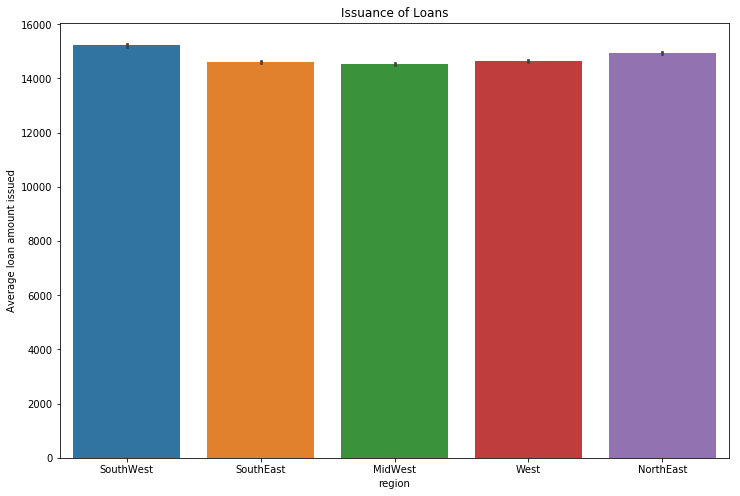

In [8]:
## 3.classify the area of the loan and find out which area has the largest amount of loan issuance
loan['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



loan['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


loan['region'] = loan['addr_state'].apply(finding_regions)

# plot the amount of loan issuance by different regions
##it turns out southweastern
plt.figure(figsize=(12,8))
sns.barplot('region', 'loan_amount', data=loan)
plt.title('Issuance of Loans')
plt.xlabel('region')
plt.ylabel('Average loan amount issued')


In [9]:
## classify different types of loan
loan["loan_status"].value_counts()
## Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


loan['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
loan['loan_condition'] = loan['loan_status'].apply(loan_condition)

##check the number of good loans and bad loans
##this is an imbalanced classified problem
loan['loan_condition'].value_counts()


Good Loan    819950
Bad Loan      67429
Name: loan_condition, dtype: int64

[Text(0,0.5,'(%)')]

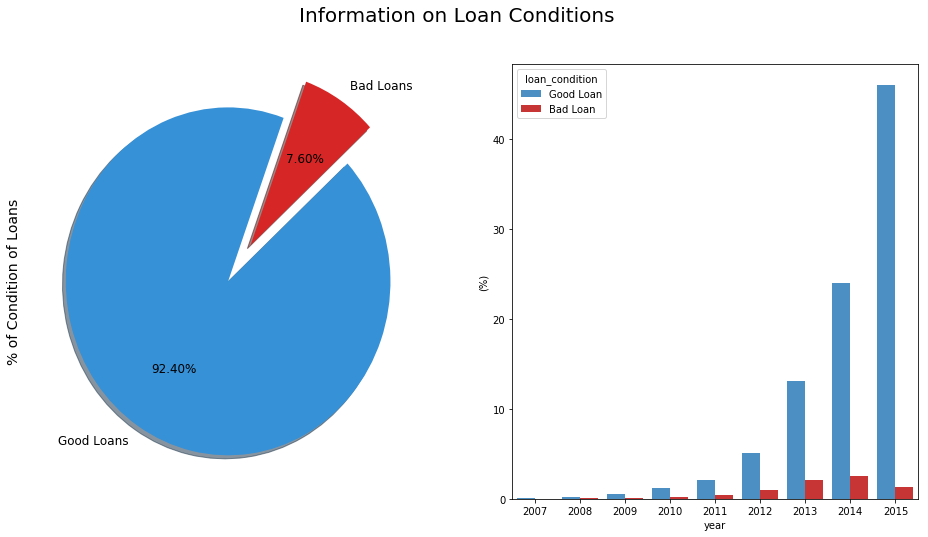

In [10]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

##???how to change this to a barplot or histagram
loan["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=loan, palette=palette, estimator=lambda x: len(x) / len(loan) * 100)
ax[1].set(ylabel="(%)")


In [11]:
##Examine missing data
## Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
## how to handle missing value data
missing_values = missing_values_table(loan)
missing_values.head(20)

Your selected dataframe has 77 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
dti_joint,886870,99.9
annual_inc_joint,886868,99.9
verification_status_joint,886868,99.9
il_util,868762,97.9
mths_since_rcnt_il,866569,97.7
total_cu_tl,866007,97.6
inq_fi,866007,97.6
all_util,866007,97.6
max_bal_bc,866007,97.6
open_rv_24m,866007,97.6


In [12]:
## add the close look of each kind of loan_condition's performance

In [13]:
## check the column types

# Number of each type of column
loan.dtypes.value_counts()

float64    49
object     25
int64       3
dtype: int64

In [14]:
##Number of unique classes in each object column(check the categorical columns)
loan.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

##drop some unrelated columns and columns with high numbers of unique values
loan.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

In [19]:
## Encoding Catergorical variables
# one-hot encoding of categorical variables
loan = pd.get_dummies(loan)

print('Features shape: ', loan.shape)

loan.head()

Features shape:  (887379, 1306)


,loan_amount,funded_amount,investor_funds,interest_rate,installment,annual_income,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,region_MidWest,region_NorthEast,region_SouthEast,region_SouthWest,region_West,loan_condition_Bad Loan,loan_condition_Good Loan
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,...,0,0,0,0,0,0,1,0,0,1
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,...,0,0,0,0,0,1,0,0,1,0
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,...,0,0,0,1,0,0,0,0,0,1
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,0,0,0,0,0,0,0,1,0,1
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,...,0,0,0,0,0,0,0,1,0,1


In [16]:
 # Find correlations with the target and sort
correlations = loan.corr()['loan_condition'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

KeyError: 'loan_condition'

Model 1:
pca analysis and logistice regression

In [17]:
##PCA Analysis and logistic regression
##import packages for PCA and logistic regression
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [21]:
##split the training data and the test data
y=loan['loan_condition']
X = loan.drop('loan_condition', axis=1).values
X_train, X_test,y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

KeyError: 'loan_condition'

In [ ]:
##Standardize data

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
##Make an instance of the model
pca = PCA(.95)
##fit PCA to training data
pca.fit(X_train)

pca.n_components_
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [26]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(X_test[0:10])
# test the Model Performance
score = logisticRegr.score(X_test,y_test)
print(score)

NameError: name 'LogisticRegression' is not defined

Model 2: Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

# test the model performance
score = random_forest.score(X_test,y_test)
print(score)

NameError: name 'X_train' is not defined

Model3: Decisiontree

In [ ]:
from sklearn import tree

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)

# test model performance
score = clf1.score(X_test,y_test)
print(score)

Model4: NeroNetwork

In [ ]:
from sklearn.neural_network import MLPClassifier

clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf2.fit(X_train, y_train)                         
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(5, 2),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

# test model performance
score = clf2.score(X_test,y_test)
print(score)

Model: Adaboost

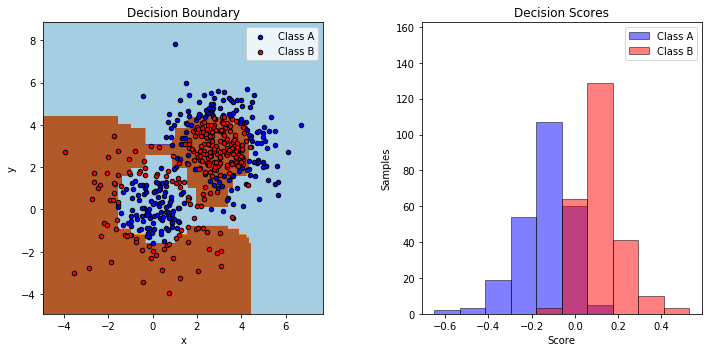

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()
